In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_excel("scrapped labeling.xlsx")

In [3]:
tweets.head()

,id_1,Tweet,Tanggal,Jumlah Retweet,Username,Sentimen
0,1253468121106652928,psbb ikut cara bayar pajak kendara cara online,2020-04-23 23:37:43,0,iantariks,Netral
1,1253465597968388096,ati ati psbb,2020-04-23 23:27:41,0,YUtaq0yaqi,Netral
2,1253467707980132096,permenhub 25 2020 mana diupload jdih ada bagi ...,2020-04-23 23:36:04,0,AnggoroPurwoto,Netral
3,1253463769457425920,warga masih bandel psbb tahap ii bakal jerat h...,2020-04-23 23:20:25,0,Estr0gen,Netral
4,1253469916872815104,ramadhan psbb perum gpi graha padalarang indah,2020-04-23 23:44:51,0,hidayatedi26,Netral


<AxesSubplot:ylabel='Sentimen'>

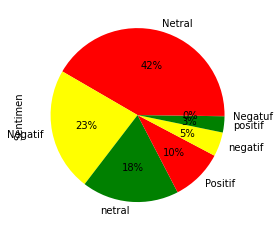

In [4]:
tweets.Sentimen.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [5]:
tweets.loc[tweets.Sentimen == "negatif", "Sentimen"] = "Negatif"
tweets.loc[tweets.Sentimen == "negatuf", "Sentimen"] = "Negatif"
tweets.loc[tweets.Sentimen == "netral", "Sentimen"] = "Netral"
tweets.loc[tweets.Sentimen == "positif", "Sentimen"] = "Positif"
tweets.loc[tweets.Sentimen == "Negatuf", "Sentimen"] = "Negatif"

<AxesSubplot:ylabel='Sentimen'>

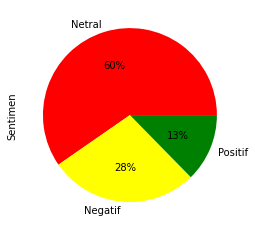

In [6]:
tweets.Sentimen.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [7]:
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
# processed_features = vectorizer.fit_transform(tweets.Tweet).toarray()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
count_vectorizer = CountVectorizer(ngram_range=(1,5))

vectorized_data = count_vectorizer.fit_transform(tweets.Tweet)
processed_features = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [19]:
processed_features

<466x15880 sparse matrix of type '<class 'numpy.int64'>'
	with 20980 stored elements in COOrdinate format>

In [20]:
labels = tweets.iloc[:, 5].values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, random_state=0))
text_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=200,
                                                     random_state=0))

In [32]:
predictions = text_classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 0 38  0]
 [ 1 81  2]
 [ 0 18  0]]
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        38
      Netral       0.59      0.96      0.73        84
     Positif       0.00      0.00      0.00        18

    accuracy                           0.58       140
   macro avg       0.20      0.32      0.24       140
weighted avg       0.35      0.58      0.44       140

0.5785714285714286


In [34]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100.0, class_weight='balanced', gamma=0.01,
                                  kernel='linear', probability=True))

In [35]:
predictions = clf.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 0 37  1]
 [ 3 77  4]
 [ 1 16  1]]
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        38
      Netral       0.59      0.92      0.72        84
     Positif       0.17      0.06      0.08        18

    accuracy                           0.56       140
   macro avg       0.25      0.32      0.27       140
weighted avg       0.38      0.56      0.44       140

0.5571428571428572
